In [1]:
import matplotlib.pyplot as plt
from cycler import cycler


cycler_colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#CF4457', '#188487', '#E24A33']
def set_matplot_params(font_size = 8, xtick_major = 0.25, xtick_minor = 0.25, ytick_major = 0.25, ytick_minor = 0.25):
    params_dict = {
        'text.usetex': False,
        # 'font.family': 'Times New Roman',
        # 'font.serif': 'Times New Roman',
        # 'font.sans-serif': 'Times New Roman',
        'font.size': font_size,
        'figure.figsize': [3.125, 1.93],  # Golden ratio
        #figure.figsize: 3.125, 1.56  # Squash for more space
        'legend.fontsize': 6,
        'legend.fancybox': False,
        'axes.linewidth': 0.5,
        'pdf.fonttype' : 42,
        'ps.fonttype' : 42,
        'axes.prop_cycle': cycler("color", cycler_colors),
                          # 348ABD : blue
                          # A60628 : red
                          # 7A68A6 : purple
                          # 467821 : green
                          # CF4457 : pink
                          # 188487 : turquoise
                          # E24A33 : orange
        'patch.linewidth': 0.5,
        'lines.linewidth': 2,
        'grid.linewidth': 0.1,
        'xtick.major.width': xtick_major,
        'xtick.minor.width': xtick_minor,
        'ytick.major.width': ytick_major,
        'ytick.minor.width': ytick_minor,
        'legend.numpoints': 1}
    plt.rcParams.update(params_dict)
set_matplot_params()

In [2]:
import os

def grab_directory_paths():
    base_path = 'database'
    campus_path = os.path.join(base_path, 'campus')
    satellite_path = os.path.join(base_path, 'satellite')
    paths = {}
    paths["campus"] = {}
    paths["satellite"] = {}
    for speed in ['3Mbps', '5Mbps']:
        paths["campus"][speed] = []
        if speed == '5Mbps':
            paths["satellite"][speed] = []
        campus_speed_path = os.path.join(campus_path, speed)
        satellite_speed_path = os.path.join(satellite_path, speed)
        for folder in range(1, 11):
            campus_folder_path = os.path.join(campus_speed_path, str(folder))
            satellite_folder_path = os.path.join(satellite_speed_path, str(folder))
            if speed == '5Mbps':
                paths["satellite"][speed].append(satellite_folder_path)
            paths["campus"][speed].append(campus_folder_path)
    
    return paths

datapaths = grab_directory_paths()
c5 = datapaths["campus"]["5Mbps"]
c3 = datapaths["campus"]["3Mbps"] 
s5 = datapaths["satellite"]["5Mbps"]
campus = datapaths["campus"]
satellite = datapaths["satellite"]
print(datapaths)

{'campus': {'3Mbps': ['database/campus/3Mbps/1', 'database/campus/3Mbps/2', 'database/campus/3Mbps/3', 'database/campus/3Mbps/4', 'database/campus/3Mbps/5', 'database/campus/3Mbps/6', 'database/campus/3Mbps/7', 'database/campus/3Mbps/8', 'database/campus/3Mbps/9', 'database/campus/3Mbps/10'], '5Mbps': ['database/campus/5Mbps/1', 'database/campus/5Mbps/2', 'database/campus/5Mbps/3', 'database/campus/5Mbps/4', 'database/campus/5Mbps/5', 'database/campus/5Mbps/6', 'database/campus/5Mbps/7', 'database/campus/5Mbps/8', 'database/campus/5Mbps/9', 'database/campus/5Mbps/10']}, 'satellite': {'5Mbps': ['database/satellite/5Mbps/1', 'database/satellite/5Mbps/2', 'database/satellite/5Mbps/3', 'database/satellite/5Mbps/4', 'database/satellite/5Mbps/5', 'database/satellite/5Mbps/6', 'database/satellite/5Mbps/7', 'database/satellite/5Mbps/8', 'database/satellite/5Mbps/9', 'database/satellite/5Mbps/10']}}


In [3]:
import json
import json
from datetime import datetime
import pytz

def iso_to_epoch_milliseconds(date_string):
    # Parse the date string to a datetime object
    dt = datetime.fromisoformat(date_string)
    
    # Convert the datetime object to UTC
    dt_utc = dt.astimezone(pytz.UTC)
    
    # Calculate the number of milliseconds since Unix epoch
    epoch = datetime(1970, 1, 1, tzinfo=pytz.UTC)
    milliseconds_since_epoch = int((dt_utc - epoch).total_seconds() * 1000)
    
    return milliseconds_since_epoch



def analyze_video_response(folder_path):
    video_responses = []
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".har"):
            file_path = os.path.join(folder_path, file_name)
            
            with open(file_path, "r") as file:
                har_data = json.load(file)
                
                for entry in har_data["log"]["entries"]:
                    if entry["response"]["content"]["mimeType"] == "video/mp4":
                        start_time = iso_to_epoch_milliseconds(entry["startedDateTime"])
                        video_response = {
                            # "url": entry["request"]["url"],
                            "start_time": start_time,
                            "duration": entry["time"],
                            "response_size": entry["response"]["bodySize"],
                            "status": entry["response"]["status"]
                        }
                        video_responses.append(video_response)
    return video_responses

data = {}
for folder in c5:
    data[folder] = analyze_video_response(folder)
for folder in c3:
    data[folder] = analyze_video_response(folder)
for folder in s5:
    data[folder] = analyze_video_response(folder)

for folder in data:
    print(folder, data[folder])




database/campus/5Mbps/1 [{'start_time': 1716279238619, 'duration': 472, 'response_size': -1, 'status': 206}]
database/campus/5Mbps/2 [{'start_time': 1716279297560, 'duration': 307, 'response_size': -1, 'status': 206}, {'start_time': 1716279308373, 'duration': 151, 'response_size': -1, 'status': 206}, {'start_time': 1716279308667, 'duration': 1920, 'response_size': 716091, 'status': 206}, {'start_time': 1716279311287, 'duration': 270, 'response_size': -1, 'status': 206}, {'start_time': 1716279311780, 'duration': 326, 'response_size': -1, 'status': 206}]
database/campus/5Mbps/3 [{'start_time': 1716279335872, 'duration': 2772, 'response_size': 893964, 'status': 206}, {'start_time': 1716279341001, 'duration': 185, 'response_size': -1, 'status': 206}, {'start_time': 1716279341618, 'duration': 8678, 'response_size': 3904535, 'status': 206}, {'start_time': 1716279349996, 'duration': 184, 'response_size': -1, 'status': 206}, {'start_time': 1716279350268, 'duration': 135, 'response_size': -1, '

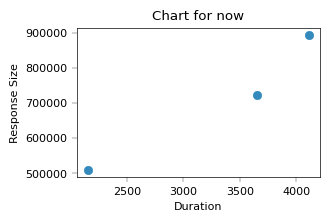

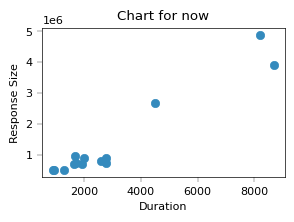

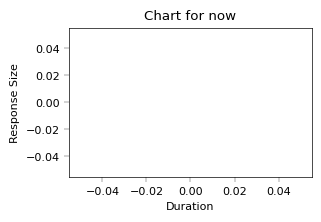

In [16]:
import matplotlib.pyplot as plt

def chart_data(data, keys):
    filtered_durations = []
    filtered_response_sizes = []
    for key in keys:
        if key in data:
            durations = [response['duration'] for response in data[key]]
            response_sizes = [response['response_size'] for response in data[key]]
            
            # Filter out response_sizes that are -1
            for i in range(len(response_sizes)):
                if response_sizes[i] != -1:
                    filtered_durations.append(durations[i])
                    filtered_response_sizes.append(response_sizes[i])
    
    plt.scatter(filtered_durations, filtered_response_sizes)
    plt.xlabel('Duration')
    plt.ylabel('Response Size')
    plt.title(f'Chart for now')
    plt.show()

# Example usage
chart_data(data, c3)
chart_data(data, c5)
chart_data(data, s5)


In [34]:
import os
import pandas as pd
import json

def get_first_positive_row(directory):
    # Get the path of the .csv file in the directory
    csv_file = [file for file in os.listdir(directory) if file.endswith('.csv')]
    if not csv_file:
        return None
    csv_path = os.path.join(directory, csv_file[0])
    
    # Read the .csv file into a pandas DataFrame
    df = pd.read_csv(csv_path)
    
    # Find the first row where currentTime > 0
    first_positive_row = df[df['currentTime'] > 0].iloc[0]
    
    # Convert the first_positive_row to JSON format
    # ...

    first_positive_row_json = first_positive_row.to_json()
    first_positive_row_dict = json.loads(first_positive_row_json)
    
    return first_positive_row_dict

QoE = {}
for folder in data:
    first_positive_row = get_first_positive_row(folder)
    if first_positive_row is not None:
        QoE[folder] = first_positive_row
    else:
        print(f"Could not find a positive currentTime in {folder}")  
    QoE[folder]['player_load_time'] = QoE[folder]['extension_loaded_time'] - data[folder][0]['start_time']
    print(QoE[folder]['player_load_time'])


1194
301
720
411
672
443
279
630
1204
606
2059
720
622
2878
884
1421
1164
867
1387
685
637
1064
802
788
794
705
894
1325
714
798


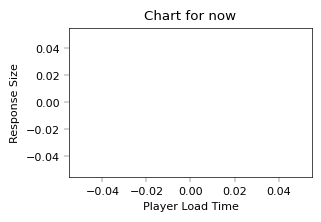

In [40]:
def chart_time(data, keys):
    for key in keys:
        load_times = []
        response_sizes = []
        if key in data and len(data[key]) > 0 and data[key][0]['response_size'] > 0:
            response_sizes = [response['response_size'] for response in data[key]]
            for i in len(response_sizes):
                
    plt.scatter(load_times, response_sizes)
    plt.xlabel('Player Load Time')
    plt.ylabel('Response Size')
    plt.title('Chart for now')
    plt.show()

chart_time(data, c3)

# incomplete, need to figure out if the response_sizes are for a single or multiple request, 
# find the correct single one
# and then compare that to the load time of the player


In [5]:
import numpy as np

average = {}

for folder in data:
    durations = [response['duration'] for response in data[folder]]
    response_sizes = [response['response_size'] for response in data[folder]]
    
    # Check if all response_sizes are -1
    if all(response_size == -1 for response_size in response_sizes):
        continue
    
    # Calculate mean
    mean_duration = np.mean(durations)
    mean_response_size = np.mean(response_sizes)
    # Calculate median
    median_duration = np.median(durations)
    median_response_size = np.median(response_sizes)
    # Calculate standard deviation
    std_duration = np.std(durations)
    std_response_size = np.std(response_sizes)
    # Calculate Data Per Second
    mean_data_per_second = mean_duration / mean_response_size
    median_data_per_second = median_duration / median_response_size
    std_data_per_second = std_duration / std_response_size
    
    # Attach metrics to the dictionary
    average[folder] = {'mean_data_per_second': mean_data_per_second, 'median_data_per_second': median_data_per_second, 'std_data_per_second': std_data_per_second}
    
    print(average[folder])


{'mean_data_per_second': 0.004153126645226069, 'median_data_per_second': -307.0, 'std_data_per_second': 0.002322975688599677}
{'mean_data_per_second': 0.002491197241802432, 'median_data_per_second': -185.0, 'std_data_per_second': 0.002182674937827164}
{'mean_data_per_second': 0.0041801506893952775, 'median_data_per_second': -322.0, 'std_data_per_second': 0.002913396194316697}
{'mean_data_per_second': 0.001853888652766203, 'median_data_per_second': 0.0017974282647556892, 'std_data_per_second': 0.0016615926571323086}
{'mean_data_per_second': 0.001792756941027122, 'median_data_per_second': 0.002377888126025309, 'std_data_per_second': 0.0016182556246086784}
{'mean_data_per_second': 0.003948820946258103, 'median_data_per_second': -299.0, 'std_data_per_second': 0.0031907991485153678}
{'mean_data_per_second': 0.002351134030313955, 'median_data_per_second': -139.0, 'std_data_per_second': 0.0020230900598687887}
{'mean_data_per_second': 0.005483122680918733, 'median_data_per_second': -374.0, 'st